In [3]:
#!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 305kB/s 
     |████████████████████████████████| 10.4MB 42.4MB/s 


In [0]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
ny_fp = "/content/ZIP_CODE_040114.shp"
chi_fp = "/content/geo_export_33c893de-4910-45c0-b0c5-f56cb85a4856.shp"

In [15]:
ny_fp = "/content/ZIP_CODE_040114.shp"
map_df = gpd.read_file(ny_fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [0]:
map_df = map_df[map_df["PO_NAME"] == "New York"]
map_df['ZIPCODE'] = map_df['ZIPCODE'].astype('int64')

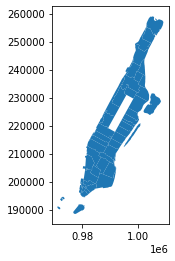

In [17]:
map_df.plot()

In [13]:
map_df.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry'],
      dtype='object')

In [0]:
ny_data = pd.read_csv("flattened_data_New_York.csv")
ny_data = ny_data[["zipcode", "label"]]
ny_data['label'] = ny_data['label'].map({-1: 0, 1: 1})


In [0]:
agg_data = ny_data.groupby("zipcode").agg({'label': ['count','sum']}).reset_index()
agg_data['fake_ratio'] = 1 - (agg_data['label']['sum']/agg_data['label']['count'])
agg_data = agg_data[['zipcode', 'fake_ratio']]
agg_data.columns = agg_data.columns.droplevel(1)

In [47]:
agg_data.columns

Index(['zipcode', 'fake_ratio'], dtype='object')

In [27]:
agg_data

,zipcode,fake_ratio
,,
0,0,0.076521
1,6901,0.089744
2,7010,0.107492
3,7018,0.093264
4,7042,0.171429
...,...,...
104,11385,0.114583
105,11418,0.092308
106,11419,0.076923


In [0]:
merged_df = pd.merge(map_df, agg_data, how='left', left_on='ZIPCODE', right_on='zipcode')

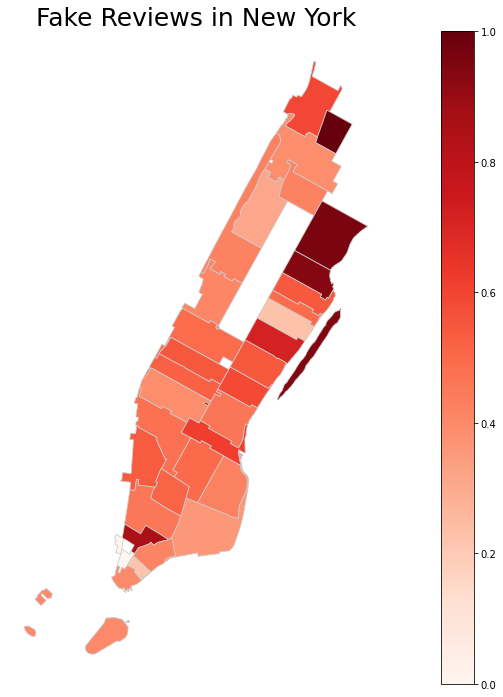

In [58]:
variable = 'fake_ratio'
vmin, vmax = 0, 1
fig, ax = plt.subplots(1, figsize=(20, 12))
merged_df.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Fake Reviews in New York', fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

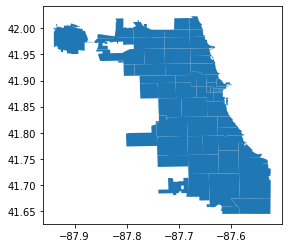

In [66]:
chi_fp = "/content/geo_export_33c893de-4910-45c0-b0c5-f56cb85a4856.shp"
map_df2 = gpd.read_file(chi_fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# map_df2.head()
map_df2.plot()

In [67]:
map_df2.head()

,objectid,shape_area,shape_len,zip,geometry
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917..."
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922..."
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909..."
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895..."
